# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\KPC\AppData\Local\Temp\ipykernel_10280\2465885303.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


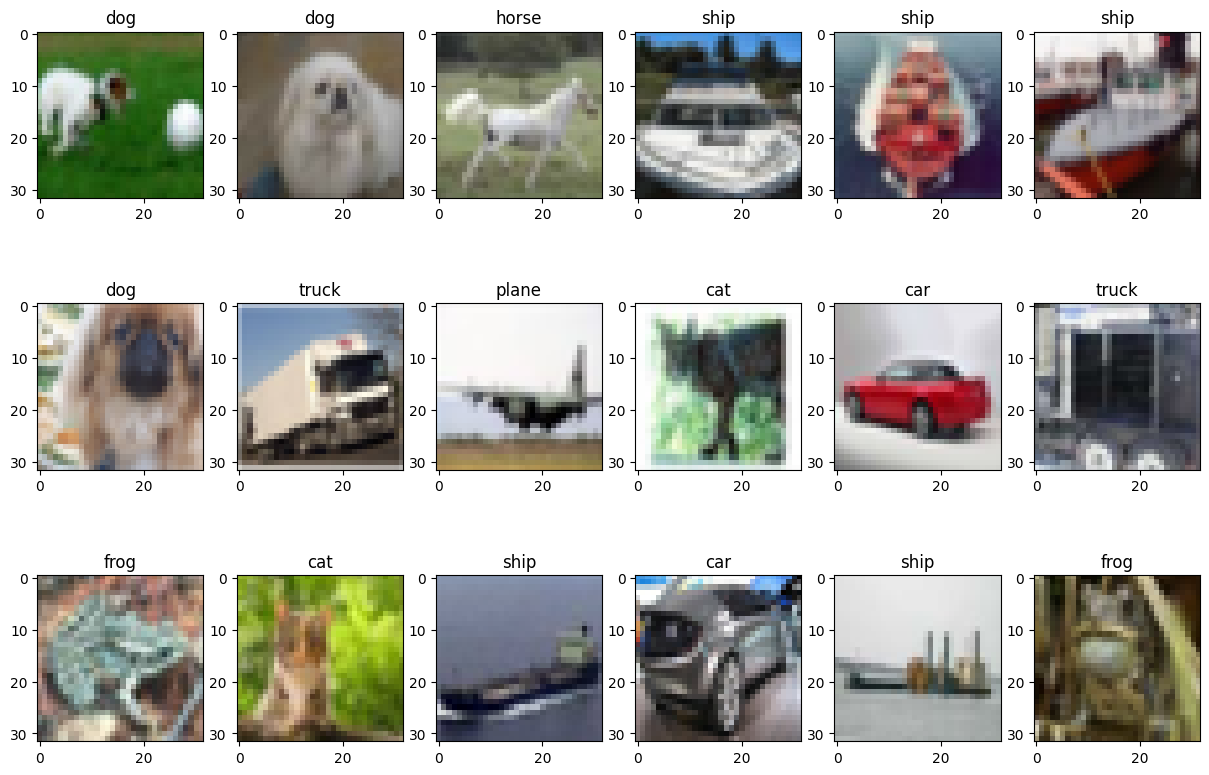

In [79]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[0]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes distribution'), Text(0, 0.5, 'Counts'))

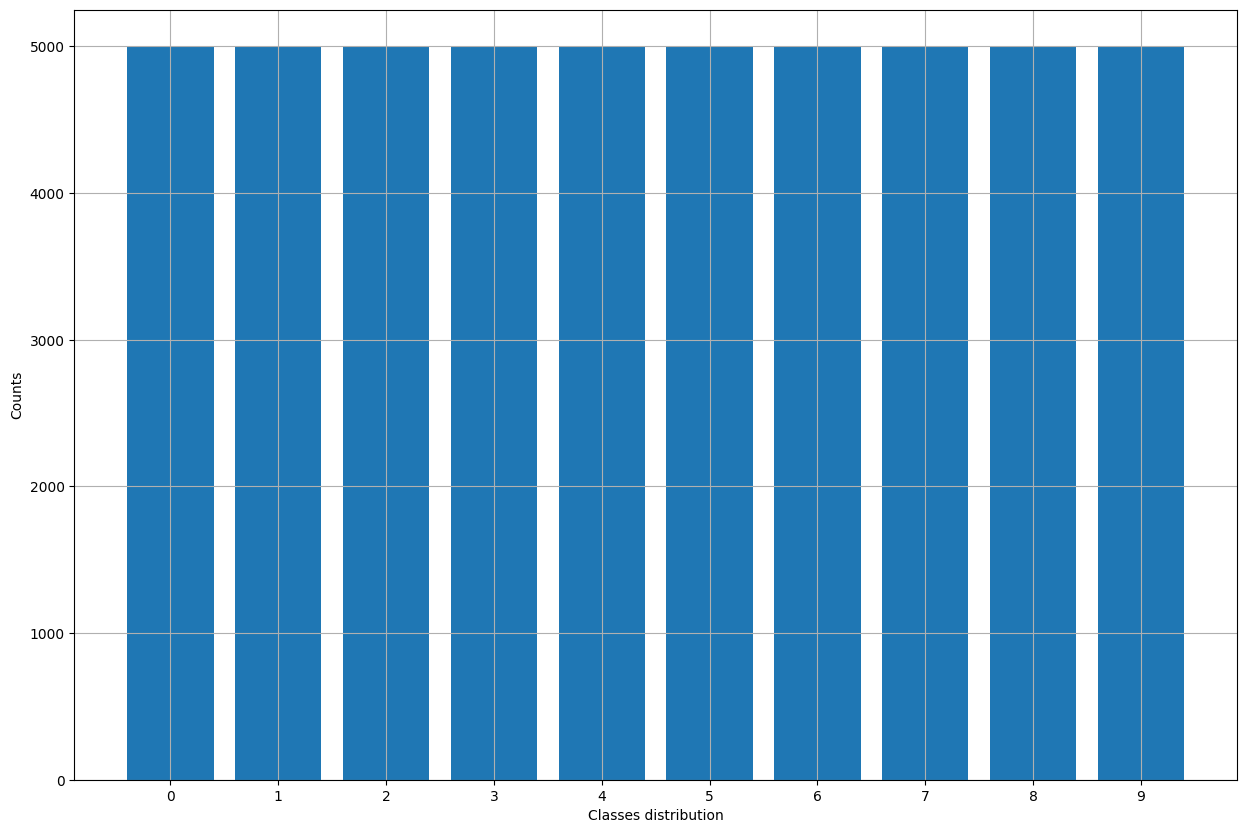

In [80]:
# Compute the class histogram
from collections import Counter
hist = Counter(y_train[:,0])

plt.bar(hist.keys(), hist.values()), plt.xticks(np.arange(0, len(hist), step=1)), plt.grid(True)
plt.xlabel('Classes distribution'), plt.ylabel('Counts')

This is ballanced dataset

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [81]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [82]:
# Build the classifier
inputs = Input(shape=x_train.shape[1:])
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
tf.debugging.set_log_device_placement(False)
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 576)               0  

### Step 3: Training

Compile the model and train it.

In [83]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 2s 5ms/step - loss: 1.8240 - accuracy: 0.3501 - val_loss: 1.5939 - val_accuracy: 0.4344
Epoch 2/25
352/352 [==============================] - 2s 5ms/step - loss: 1.5079 - accuracy: 0.4658 - val_loss: 1.4320 - val_accuracy: 0.4856
Epoch 3/25
352/352 [==============================] - 2s 4ms/step - loss: 1.4061 - accuracy: 0.5044 - val_loss: 1.3768 - val_accuracy: 0.5132
Epoch 4/25
352/352 [==============================] - 2s 4ms/step - loss: 1.3402 - accuracy: 0.5271 - val_loss: 1.3076 - val_accuracy: 0.5406
Epoch 5/25
352/352 [==============================] - 2s 4ms/step - loss: 1.2959 - accuracy: 0.5462 - val_loss: 1.2696 - val_accuracy: 0.5598
Epoch 6/25
352/352 [==============================] - 2s 4ms/step - loss: 1.2582 - accuracy: 0.5608 - val_loss: 1.2353 - val_accuracy: 0.5686
Epoch 7/25
352/352 [==============================] - 2s 4ms/step - loss: 1.2280 - accuracy: 0.5711 - val_loss: 1.2302 - val_accuracy: 0.5716
Epoch 

Train Acc      0.6489111185073853
Validation Acc 0.633400022983551


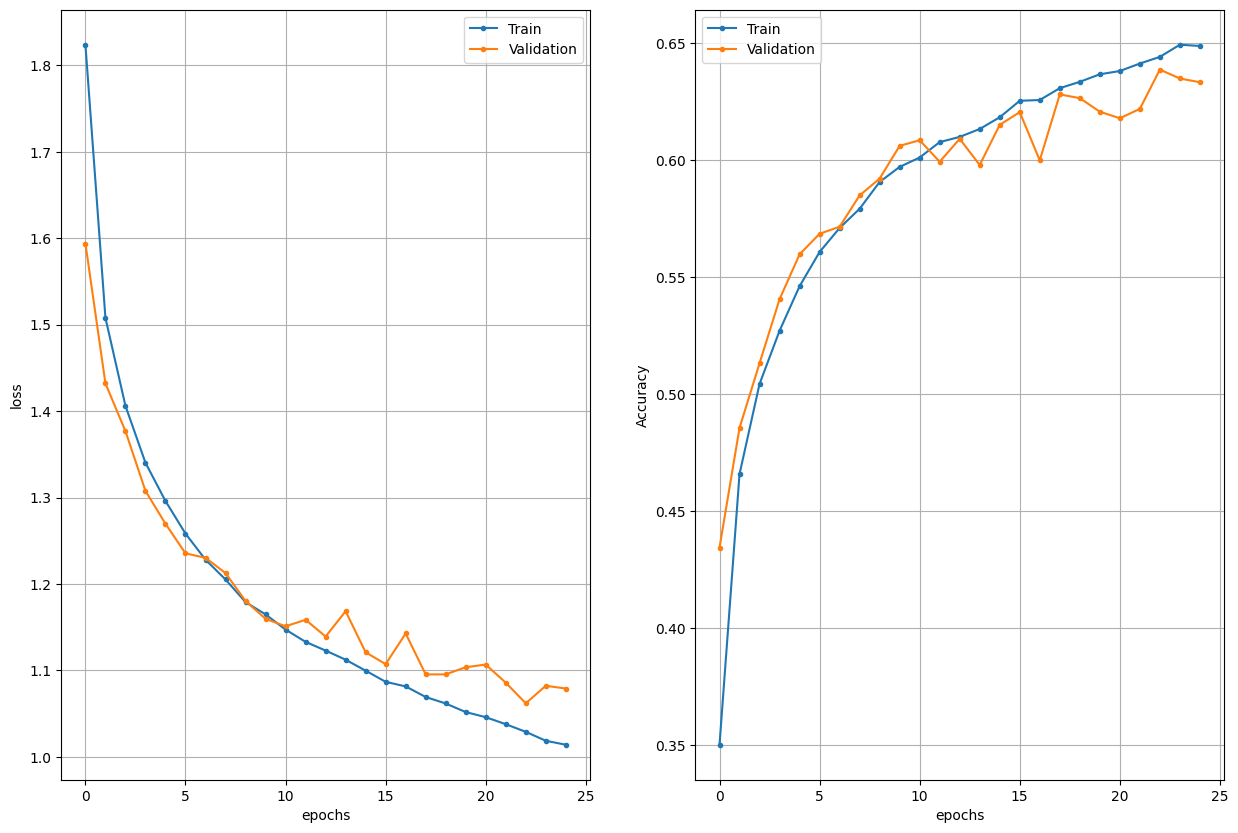

In [84]:
# Show training history (this cell is complete, nothing to implement here :-) )
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                            epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
plot_history(history)

In [85]:
# history_2 = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.1)
# plot_history(history_2)

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [86]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [87]:
# Compute and print the accuracy for each class
# for class_id, class_name in classes.items():
    
start_time = time()
classes_count = len(classes)
sum_of_true = [0] * classes_count
sum_of_pred = [0] * classes_count
for idx, classID in enumerate(y_true):
    sum_of_true[classID] += 1
    if y_pred[idx] == classID:
        sum_of_pred[classID] += 1

for classID in range(0, classes_count):
    print(f'Accuracy of {classID}: {sum_of_pred[classID] / sum_of_true[classID]}')

print(f'time={time() - start_time}')
print('\n')

start_time = time()
digits = range(0, classes_count)
for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)

print(f'time={time() - start_time}')
print('\n')

print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

# OK. Masks with np are faster) Power of C++ ) 
# In languages like c++ or in python without binary libs like np, 
# the second aproach has pure performance because the operation of mask receiving and sum also have O(N) difficulty
    

Accuracy of 0: 0.629
Accuracy of 1: 0.738
Accuracy of 2: 0.615
Accuracy of 3: 0.46
Accuracy of 4: 0.419
Accuracy of 5: 0.549
Accuracy of 6: 0.75
Accuracy of 7: 0.738
Accuracy of 8: 0.629
Accuracy of 9: 0.675
time=0.004001140594482422


Digit- 0  acc 0.629
Digit- 1  acc 0.738
Digit- 2  acc 0.615
Digit- 3  acc 0.46
Digit- 4  acc 0.419
Digit- 5  acc 0.549
Digit- 6  acc 0.75
Digit- 7  acc 0.738
Digit- 8  acc 0.629
Digit- 9  acc 0.675
time=0.0020003318786621094


y_true [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 

In [88]:
# Print the overall stats
def show_metrics(model):
    ev = model.evaluate(x_test, y_test)
    print('Test loss  ', ev[0])
    print('Test metric', ev[1])
show_metrics(model)

313/313 [==============================] - 1s 4ms/step - loss: 1.0925 - accuracy: 0.6202
Test loss   1.092477798461914
Test metric 0.620199978351593


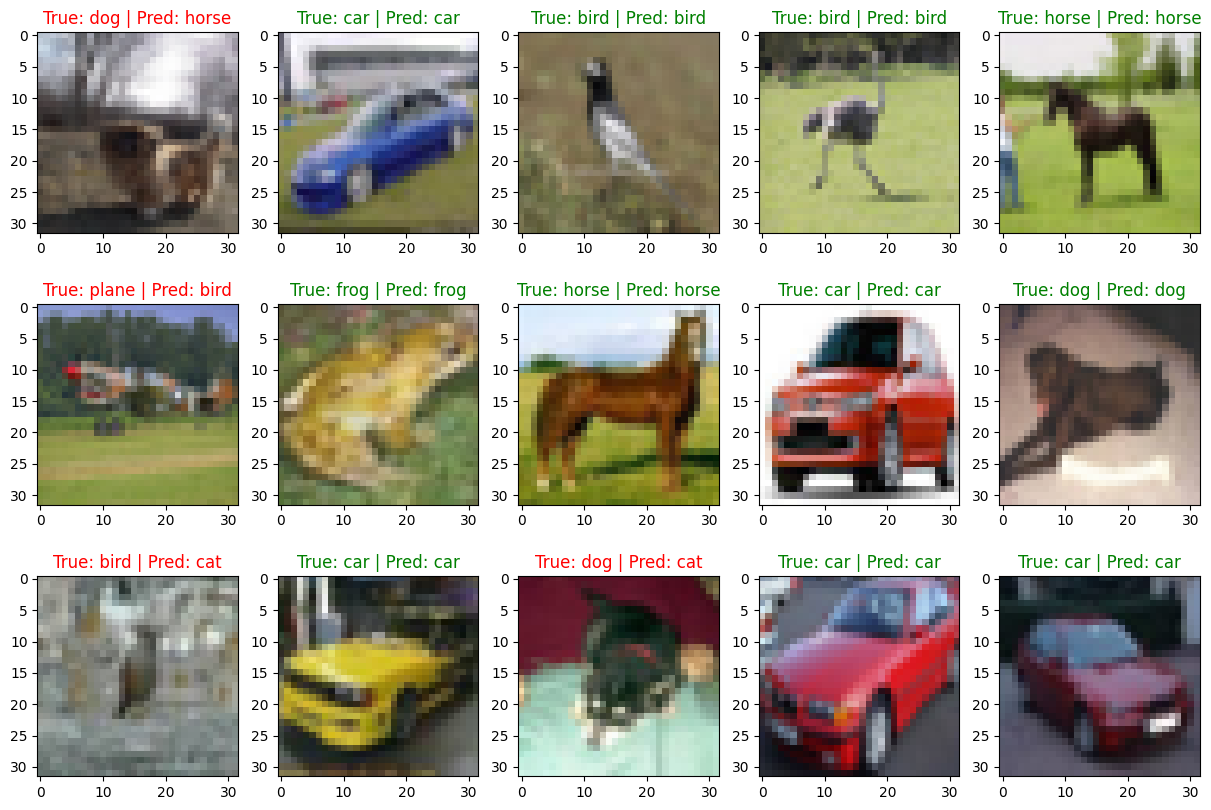

In [89]:
# Show random samples
size = x_test.shape[0]
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]), 
              color='green' if y_true[idx] == y_pred[idx] else 'red')

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 2304)              0  

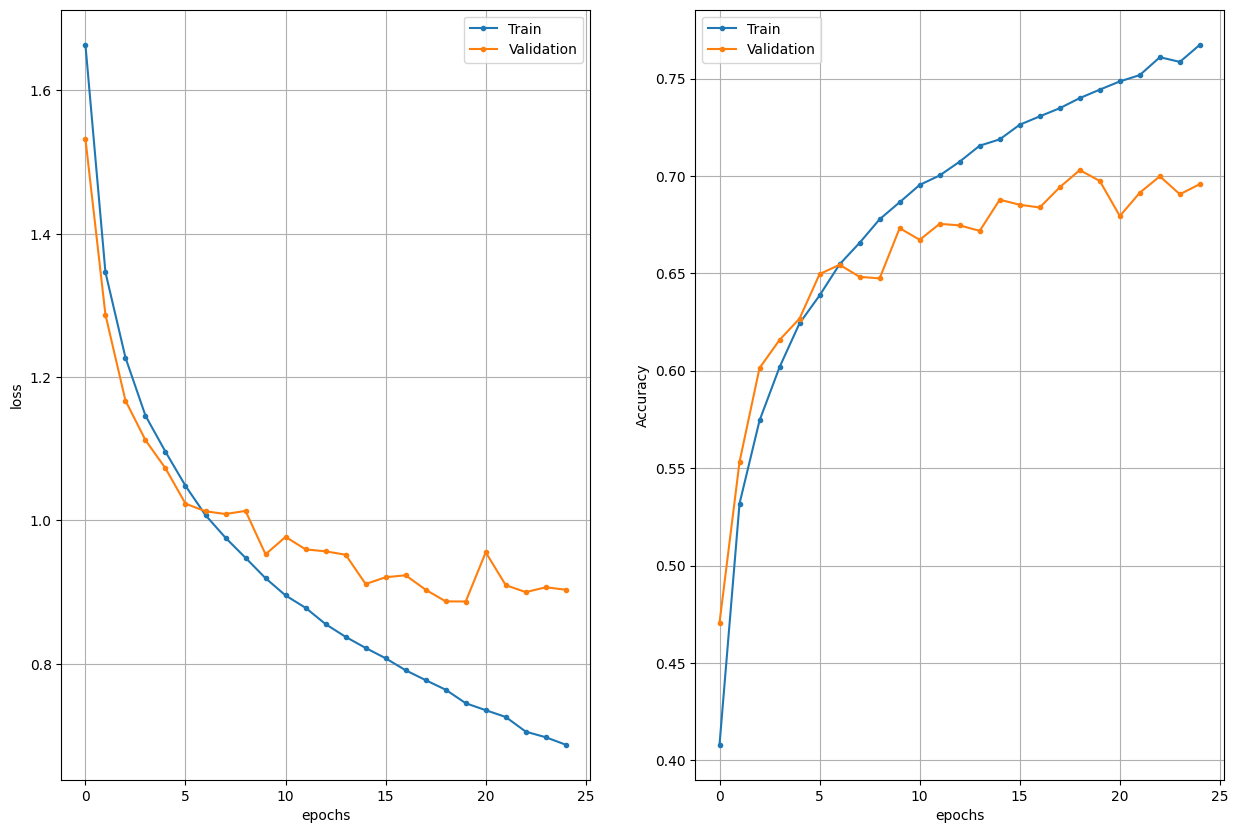

In [90]:
# Build the classifier
inputs = Input(shape=x_train.shape[1:])
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)

#Lets increase filters quantity in the second layer
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(net)

net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model2 = Model(inputs, outputs)

# Show the model
tf.debugging.set_log_device_placement(False)
model2.summary()

# Compile the model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_history(history)

In [91]:
print('First model:')
show_metrics(model)

print('\nSecond model:')
show_metrics(model2)

First model:
313/313 [==============================] - 1s 2ms/step - loss: 1.0925 - accuracy: 0.6202
Test loss   1.092477798461914
Test metric 0.620199978351593

Second model:
313/313 [==============================] - 1s 3ms/step - loss: 0.9412 - accuracy: 0.6861
Test loss   0.941176176071167
Test metric 0.6861000061035156


* I don't want to make any of proposed in the last lecture modifications. It's some type of cheat because before the moment when this HW should be done I shouldn't know about this technics. 
* I've changed only the filters quantity in the second layer but this boosts accuracy for more than 6%. Not bad I guess
* Also it looks like this model is underfilled but validation chart isn't increased anymore. When I tried to increase the epochs quanity or decrease the batch_size - I didn't receive any enhancement.